In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- following EDA is done to get better understand of dataset
- the purpose of doing preliminary EDA is to know which other preprocessing techniques need to be done to clean data
- so this is not going to be a complete EDA 

In [2]:
df= pd.read_csv('../../data/interim/reddit_preprocessed_v1.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


<Axes: xlabel='category', ylabel='count'>

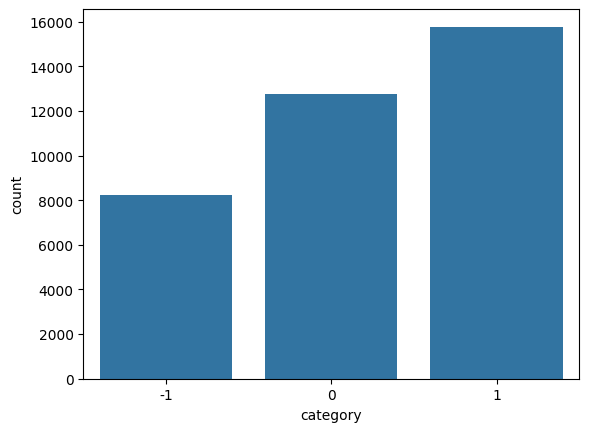

In [3]:

# distribution of classes

sns.countplot(data=df,x="category")

In [4]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

 So what we're seeing here is that we have an imbalance between our positive 
 and negative categories. It's not evenly distributed - we don't have a balanced 
 multiclass classification. This means some classes have way more examples than others.
 
 This is going to be a problem when we train our machine learning model because 
 the model will be biased towards the majority class (the one with more data).
 So we need to handle this imbalance when we're building and training our model.
 We might need to use techniques like:
 - Oversampling the minority class
 - Undersampling the majority class
 - Using weighted loss functions
 - Adjusting class weights in the model
 This way the model learns fairly from both classes.

In [5]:
# next few analysis i have done around words
# i will create a new column with word counts which counts number of words in each comment
# the goal behind this analysis is to see if there is any correlation between word count and category


df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [6]:
df.sample(5)

,clean_comment,category,word_count
24953,love this not have gas but husband convinced t...,1,96
11544,probably wants talk about having his clothing ...,1,12
31414,could this have been done bot with some bad co...,-1,28
1509,not everyone wants hear the other side some pe...,-1,45
21417,but how did the cia found this,0,7


In [7]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

##### let's break down the output of `describe()` for the `word_count` column 

- **Mean (Average):** The mean word count is about 30. So, on average, each comment contains 30 words. However, the mean can be influenced by very large or very small values (outliers).

- **Standard Deviation (std):** The standard deviation is 56, which is quite high compared to the mean. Standard deviation measures how much the word counts vary from the average. A high value here means there is a lot of spread in the data some comments are much longer or shorter than the average. This tells us that the dataset contains comments with very different lengths, and the word count is not consistent across comments.

- **Minimum (min):** The minimum word count is 1. This means there is at least one comment in the dataset that contains only a single word.

- **25th Percentile (25%):** The 25th percentile is 6. This means that 25% of the comments have 6 words or fewer. In other words, a quarter of the comments are very short.

- **Median (50%):** The median word count is 13. The median is the middle value when all comments are sorted by word count. Half the comments have fewer than 13 words, and half have more. Notice that the median (13) is much lower than the mean (30). This difference suggests that the distribution is skewed: there are some very long comments pulling the mean up, but most comments are shorter.

- **75th Percentile (75%):** The 75th percentile is 32. This means that 75% of the comments have 32 words or fewer, and only the top 25% are longer than that.

- **Maximum (max):** The maximum word count is 1307. This is an extremely long comment compared to the average and median, and it is an example of an outlier a value much higher than the rest.

**Summary:**  
The large difference between the mean and median, along with the high standard deviation and maximum value, tells us that the word count distribution is highly skewed with some very long comments (outliers). Most comments are relatively short, but a few very long ones increase the average. This is important to recognize, as these outliers can affect analyses and model training, so we may need to consider handling them again during preprocessing.

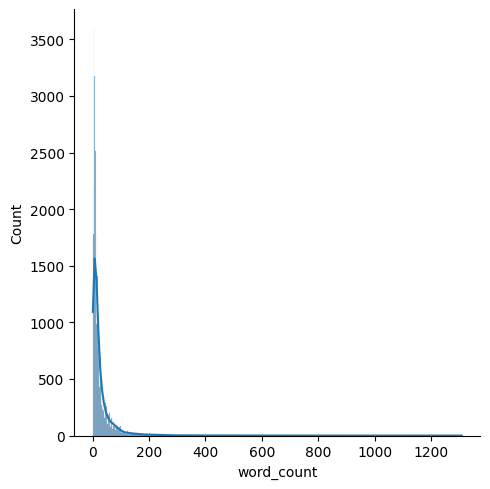

In [8]:
sns.displot(df['word_count'], kde=True)

- skewed distributuion
- there are many comments where few words have been used and few comments were many words ave been used

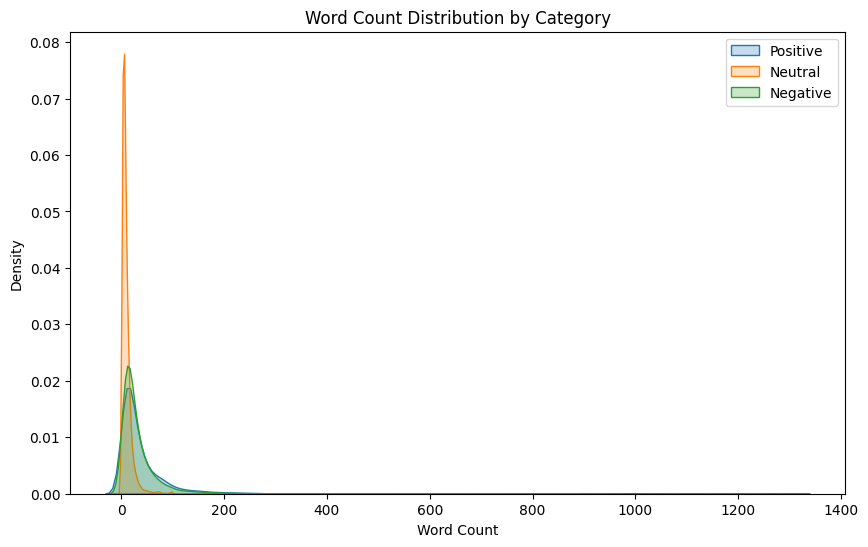

In [9]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

- same plot analysed category wise
**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: so here there are many comments where less no of words are used-The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

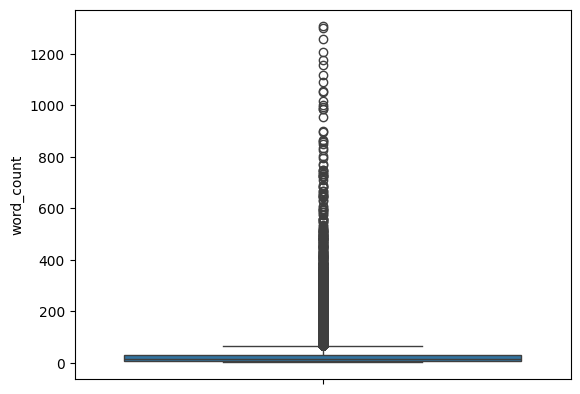

In [10]:
sns.boxplot(df['word_count'])

- above plots helps to understand outliers
- there are lot in the data 
- below will do category wise

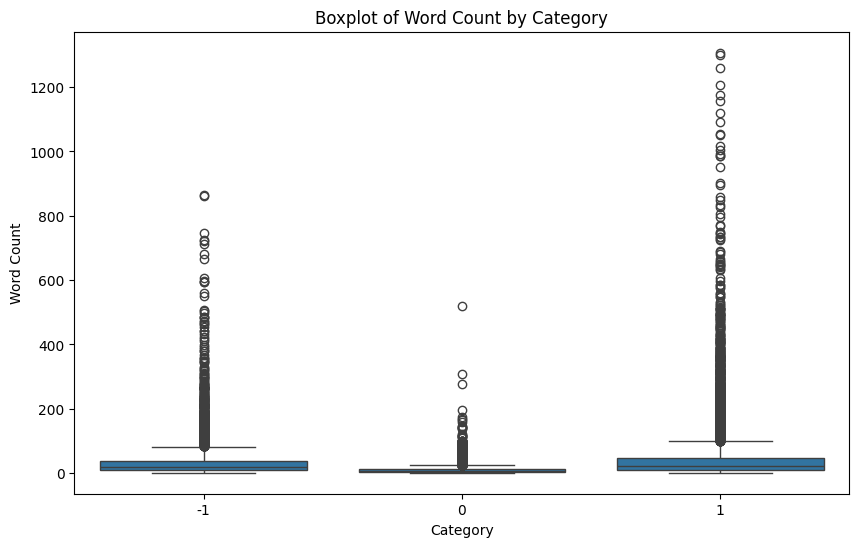

In [11]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

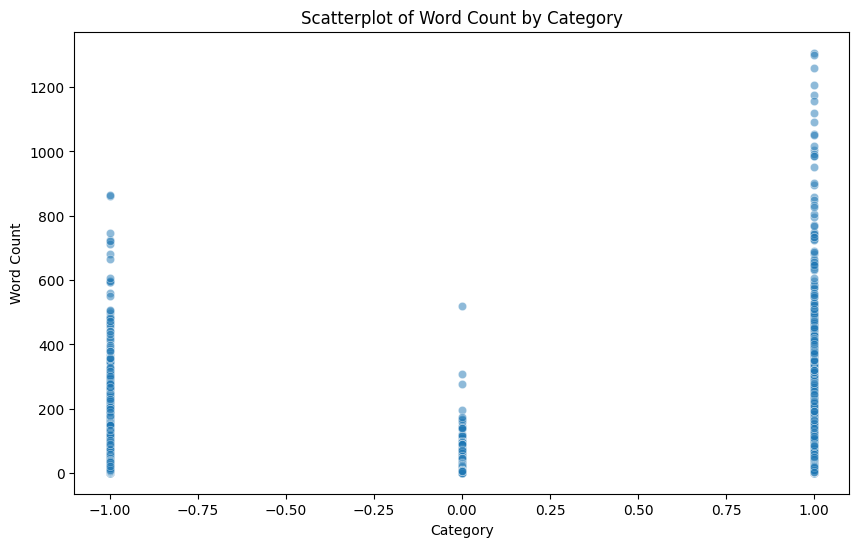

In [12]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

- same from here we can conlude lot of variety in positive and negative but not in case of neutral

<Axes: xlabel='category', ylabel='word_count'>

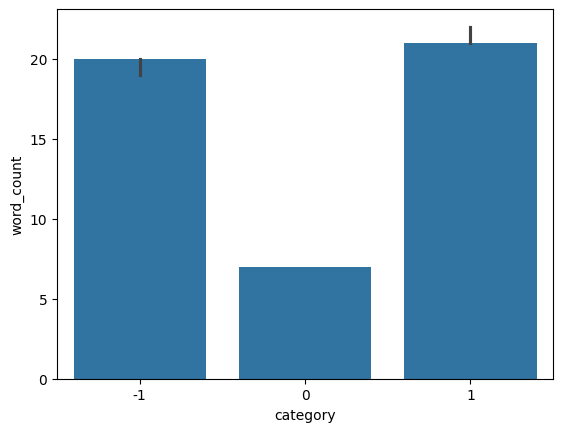

In [13]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

- median for positive and negative comments is higher than neutral comments
- this shows that people tend to write longer comments when they have strong positive or negative feelings about a topic, compared to when they feel neutral.
- so in nutshell what we have understood is neutral comments are different from +ve and -ve wrt wordcount

lets do some anlaysis on stop words eventhough we will remove them during modelling

In [14]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to C:\Users\saurabh.LAPTOP-2
[nltk_data]     HELHMCR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
35365,rumours twitter have that security related may...,0,12,3
28603,happens father law asked switch from ndtv ravi...,1,47,14
34822,the ashok gehlot rajasthan govt only has money...,1,31,9
26266,there absolutely low will not hit,0,6,3
13910,both but probably late friday sing you love so...,1,11,4


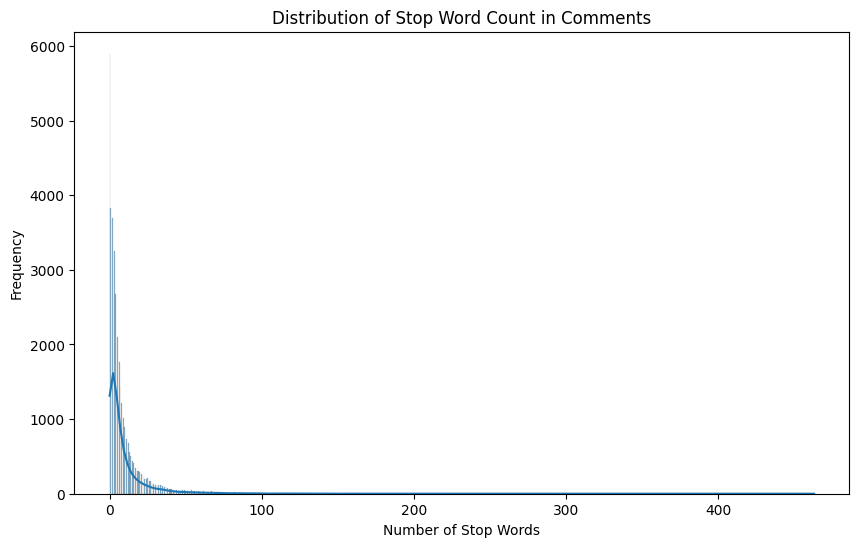

In [16]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


the didtribution says there are many comments with less no of stopwords and few comments with high no of stopwords 

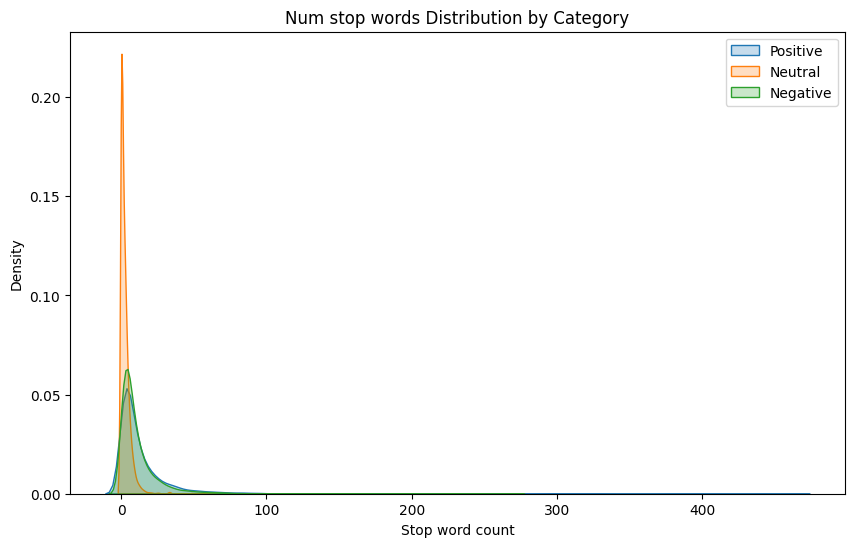

In [17]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

will do same for categories and it behaves same as expected neutral behaves differently from +ve and -ve comments

<Axes: xlabel='category', ylabel='num_stop_words'>

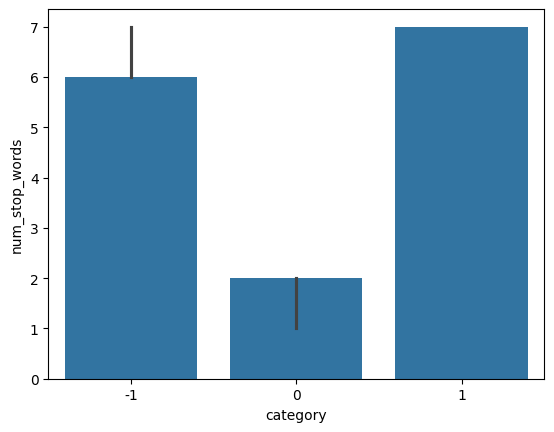

In [18]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

stopwords used on avg is very low for neutral comments as compared to positive and negative comments

next will find out the most common stop words used in comments overall and category wise

C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_10960\706517223.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


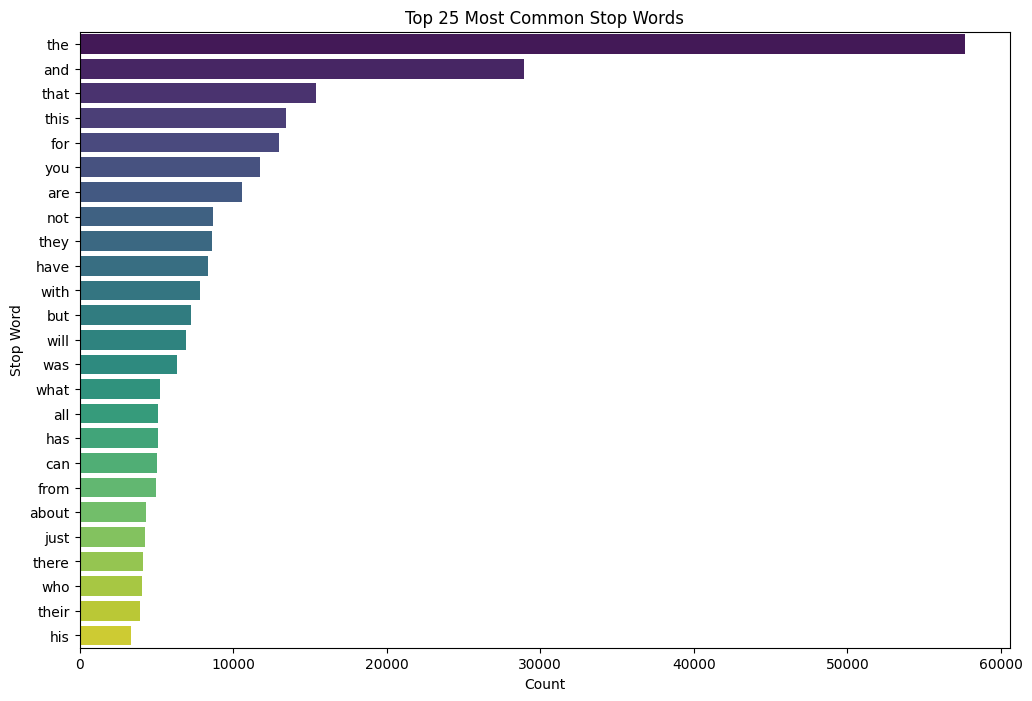

In [19]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



point of concern is "not", "but" has come many times in the comments, this can change the sentiment of the comment if not handled properly during preprocessing

next will add another columns which will basically count the characters in each comment

In [20]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [21]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

we can see similar distribution as we saw in case of words

In [22]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)
char_frequency_df.head()


,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


we can see each character frequency we can seeee white spaces are the most

In [23]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [24]:
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


- less used characters we can see and are of not the english language
- will need to handle this special characters since they do not add any meaning to the text analysis and there frequency is also very less

In [25]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
24667,roop mantra ayur face cream have absolutely ne...,-1,16,5,89,0
31347,fak mudi,0,2,0,8,0
25599,abki baar nahi modi sarkar,0,5,0,26,0
21001,will made women and child development minister...,0,8,2,51,0
26210,feel your confusion you read manga and read th...,1,11,4,59,0


In [26]:
df['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

- it seems punchuation marks are removed while creating the data
- its nice as well as its possible that punctuation could help us during sentiment analysis like exclamation, ...

C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_10960\1638384091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


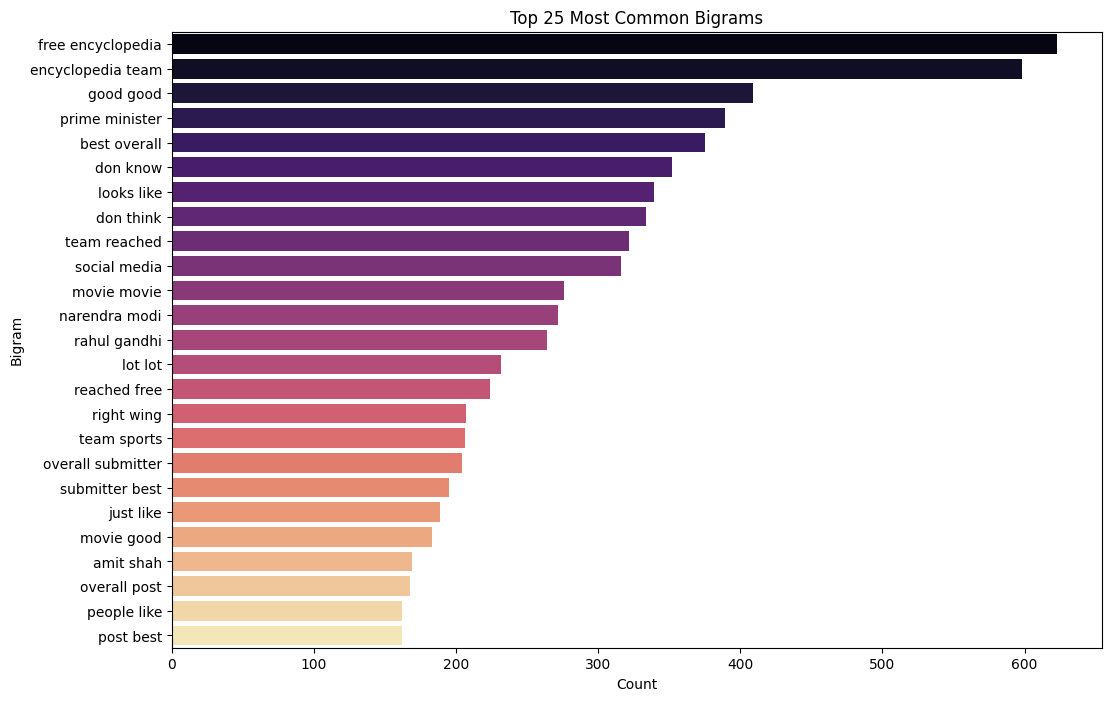

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


#### Bigram Analysis

A **bigram** is a sequence of two consecutive words that appear together in the text. By analyzing bigrams, we can understand common word pairs and phrases that frequently occur in the comments, which helps reveal underlying themes and communication patterns in the dataset.

##### Why Bigram Analysis?

1. **Contextual Understanding**: Unlike individual words, bigrams capture relationships between words, giving us better insight into what people are actually discussing.

2. **Identify Common Phrases**: Bigrams help us spot recurring phrases and expressions that are important to the sentiment analysis.

3. **Improve Preprocessing**: Understanding common phrases helps us decide which word combinations might be meaningful to preserve during model training.

4. **Pattern Recognition**: Bigrams reveal how people naturally express sentiments. For example, "don't know" or "looks like" appear frequently, which can carry different sentiments.

##### Key Observations from Our Analysis

From the top 25 bigrams, we can see several interesting patterns:

- **Repetitive Phrases**: "good good", "movie movie", "lot lot", "thing thing" indicate emphasis and intensity in comments
- **Political Content**: "prime minister", "narendra modi", "rahul gandhi", "amit shah" confirm the dataset contains significant political discourse
- **Uncertainty Expressions**: "don know", "don think" show people expressing doubt or disagreement
- **General Descriptors**: "looks like", "just like", "people like" are used for comparisons and descriptions
- **Metadata Artifacts**: "free encyclopedia", "encyclopedia team", "team reached" appear to be remnants from the data source

##### How This Helps Our Model

Understanding these bigrams will help the machine learning model better:
- Recognize sentiment carrying word pairs (e.g., "really good" vs "not good")
- Distinguish between different contexts (political criticism vs movie reviews)
- Capture nuanced expressions that single words alone cannot convey
- Identify and potentially filter out noise or irrelevant phrases


we can note: don't is written as don which needs to be considered while preprocessing as well

C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_10960\2492861520.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


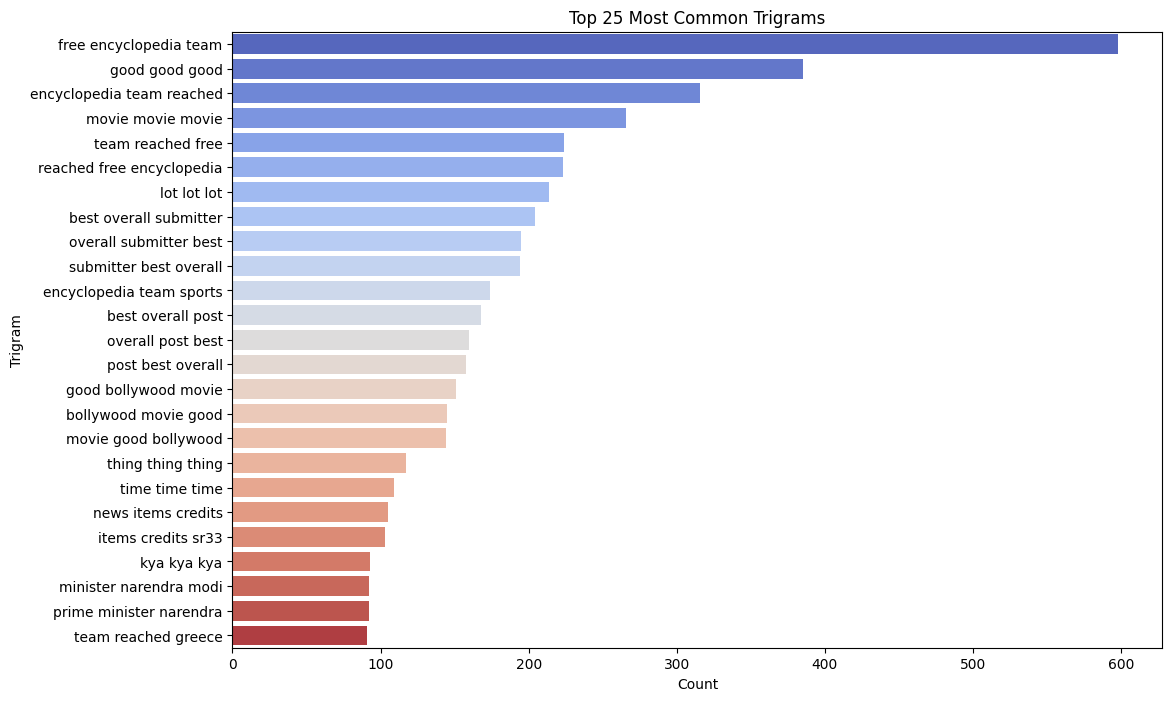

In [28]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

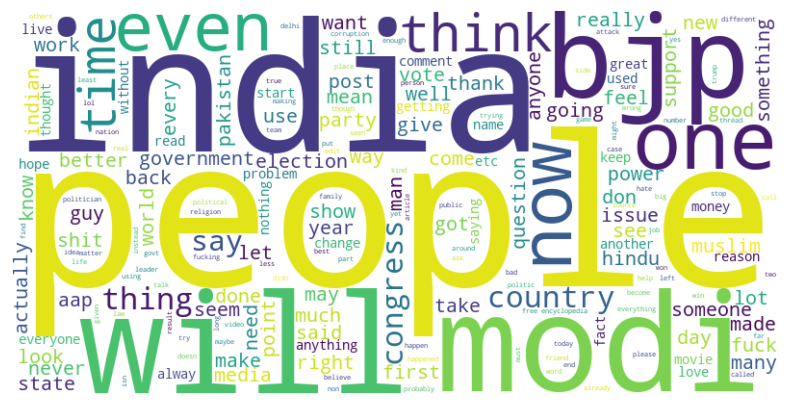

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

- we can see there are lot of political words in the wordcloud like government, people, country, etc
- so its good if we run this chrome extension on political videos to detect comments with political bias

- next will perfome sentiment specific wordcloud

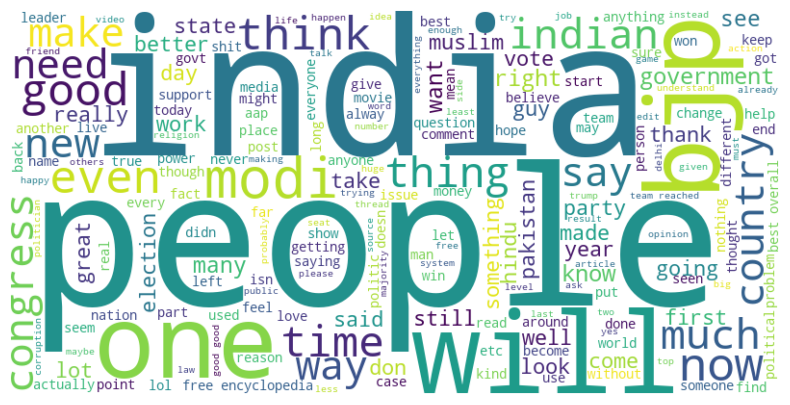

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

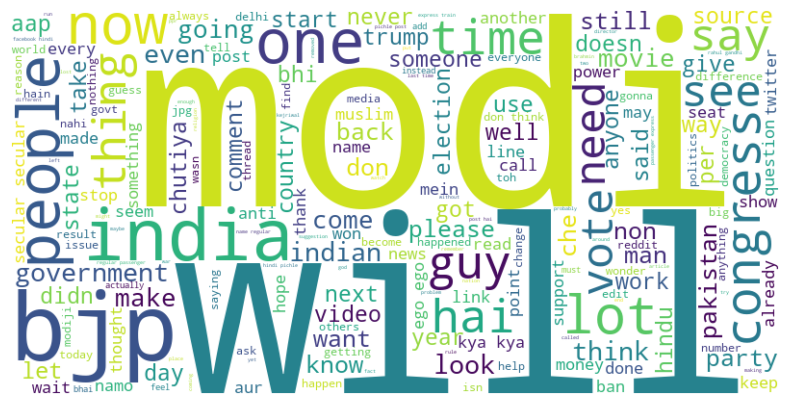

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

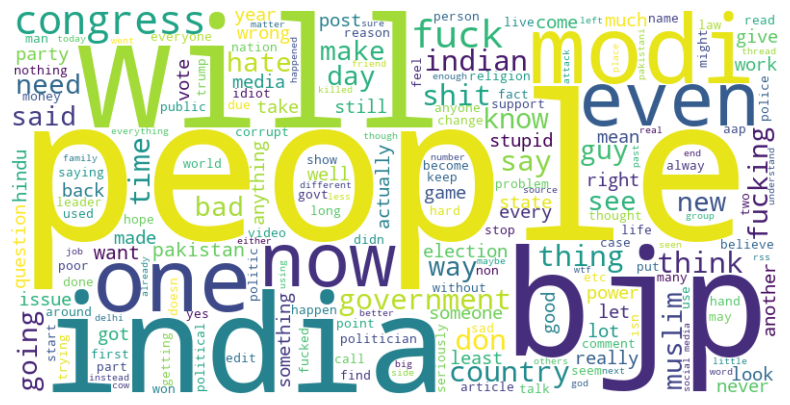

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

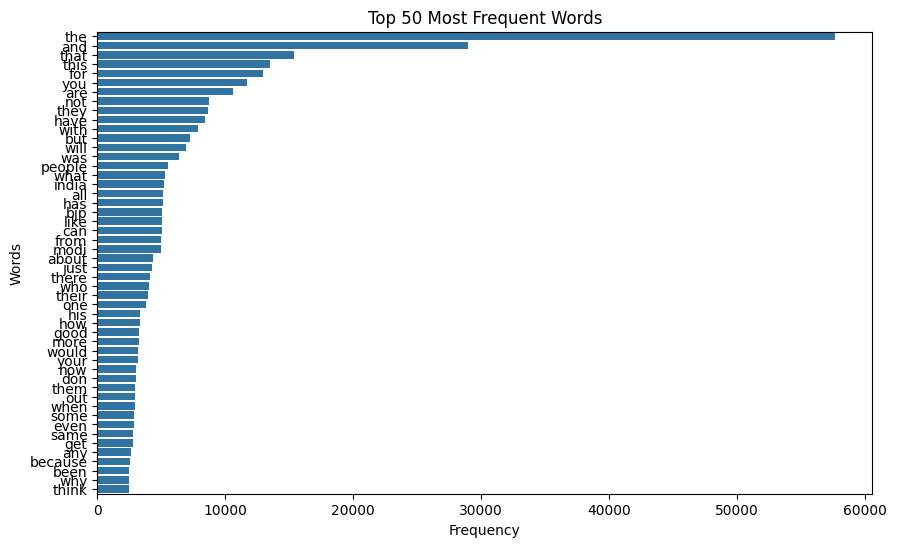

In [33]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


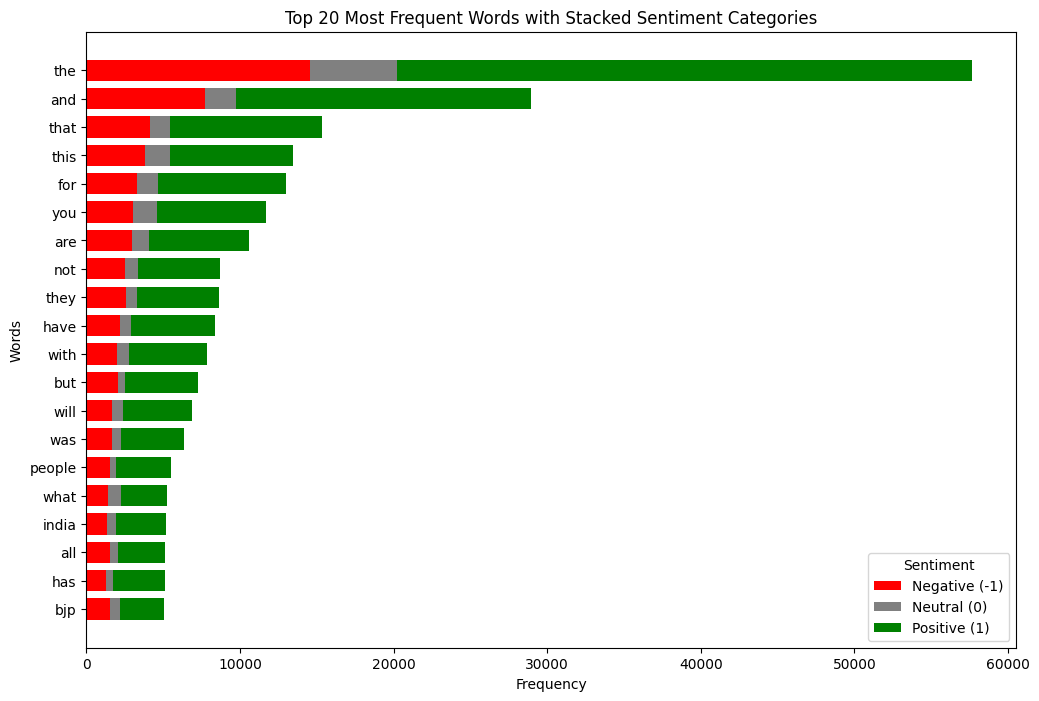

In [34]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)



This chart shows the top N most frequent words in the corpus, with each horizontal bar split by sentiment category (Negative = red, Neutral = gray, Positive = green). Bar length is total occurrences; colored segments show how that usage distributes across negative/neutral/positive comments.
- interesting to see not has occure many times in positive sentiment comments compared to negative
- but word seems to be balanced across all sentiment 



#### Preliminary EDA complete will now accordingly do preprocessing in notebook 03_data_preprocessing_v2